# Logistic Regression

## Sigmoid function

Squeezes the values from (-k, k) to (0, 1).  

$$
F(x) = \frac{1}{1 + e^{-x}}
$$

After being squeezed, we can make a **decision boundary** to determine which "class" the function belongs to.  

Useful for **Classification ML tasks**.

---

## Linear equation

We start with a linear equation \(p(x)\).  

- \(p(x)\) is **unbounded**: domain \((-\infty, \infty)\)  
- Use **logit transformation** to map to probability:  

$$
\text{logit}(p(x)) = \ln \frac{p(x)}{1 - p(x)} = a + bx
$$

- Odds formula:  

$$
\text{odds} = \frac{p}{1-p}
$$

- Example:  
  - \(0.25 / (1-0.25) = 1/3\) → 1 to 3  
  - \(0.8 / (1-0.8) = 4\) → 4 to 1  

Linear function:  

$$
f(x) = w_0 + w_1 x + \dots + w_n x_n
$$

- \(p = w_0 + w_1 x\) could be negative or greater than 1 (**unbounded**).

---

## 1. Linear function

$$
f(x)
$$

## 2. Logit (log-odds)

$$
\text{logit}(f(x)) = \ln \frac{p(x)}{1 - p(x)} = f(x)
$$

## 3. Convert logit to probability

$$
\ln \frac{p(x)}{1 - p(x)} = f(x)
$$

$$
e^{f(x)} = \frac{p(x)}{1 - p(x)}
$$

$$
e^{f(x)} - e^{f(x)} p(x) = p(x)
$$

$$
p(x) + e^{f(x)} p(x) = e^{f(x)}
$$

$$
p(x) (1 + e^{f(x)}) = e^{f(x)}
$$

$$
p(x) = \frac{e^{f(x)}}{1 + e^{f(x}} )
$$

Divide numerator and denominator by \(e^{f(x)}\):  

$$
p(x) = \frac{1}{1 + e^{-f(x)}}
$$

---

## 4. Likelihood

Bernoulli: 0/1 probabilities  

$$
P(y|x) =
\begin{cases} 
p(x), & y = 1 \\
1 - p(x), & y = 0
\end{cases}
$$

Can also be written as:  

$$
P(y|x) = p(x)^y (1 - p(x))^{1-y}
$$

---

## 5. Log-likelihood

$$
\log \text{likelihood} = y \ln p(x) + (1-y) \ln (1-p(x))
$$

Loss over dataset:  

$$
l(w) = \sum_{i=1}^n \big[ y_i \ln p(x_i) + (1-y_i) \ln (1-p(x_i)) \big]
$$

---

## 6. Cross-entropy

Minimize this function:  

$$
J(w) = - \sum_{i=1}^n \big[ y_i \ln p(x_i) + (1-y_i) \ln (1-p(x_i)) \big]
$$

This is **cross-entropy loss**.

---

## 7. Gradient

Remember:

$$
p(x) = \frac{1}{1 + e^{-Xw}}
$$

Derivative steps:

$$
y \ln p + (1-y) \ln (1-p)
$$

$$
\frac{y p'}{p} + \frac{(1-y)(-p')}{1-p}
$$

$$
\frac{p' (y-p)}{p(1-p)}
$$

Substitute derivatives:
(for the derivative of the bias i.e. with respect to b, there will be no -X on the denominator). That is the only difference.

$$
p = \frac{1}{1 + e^{-W^\top X}}, \quad p' = -X \frac{e^{-W^\top X}}{1 + e^{-W^\top X}}
$$

$$
1-p = \frac{e^{-W^\top X}}{1 + e^{-W^\top X}}
$$

Cancels out:  

$$
-X (y-p) = X (p-y)
$$

---

## 8. Gradient Descent

Update weights during training:  

$$
w_{\text{new}} = w_{\text{old}} - \eta \, X (p-y)
$$


# 

In [28]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = 0
        self.history = []
        
    def sigmoid(self, z):
        """
        Maps a value between 0 and 1
        """
        return 1 / (1 + np.exp(-z))
    
    def loss_function(self, y, p):
        """
        Cross-entropy loss function
        """
        n = len(y)
        eps = 1e-15
        p = np.clip(p, eps, 1 - eps)
        return -1/n * np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
    
    def fit(self, X, y):
        """
        Train the model.
        """
        
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        
        for _ in range(self.n_iterations): 
            
            p = self.sigmoid(X @ self.weights + self.bias)
            loss = self.loss_function(y, p)
            
            # Gradients
            dw = (1/n) * X.T @ (p - y)
            db = (1/n) * np.sum(p - y)
            
            # Update the weights
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            self.history.append(loss)
            
    
    def predict(self, X):
        """
        Given input X, predict and return output y_pred
        """
        p = self.sigmoid(X @ self.weights + self.bias)
        return (p >= 0.5).astype(int)
    
    def score(self, X_test, y_test):
        """
        MSE 
        """
        y_pred = self.predict(X_test)
        return np.mean((y_test - y_pred) ** 2)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
X = df[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']]
y = df[["TenYearCHD"]]

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit(X_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [26]:
y_train = y_train.values.flatten()
y_test = y_test.values.flatten() 

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [31]:
mse = model.score(X_test, y_test)
mse 

0.14622641509433962

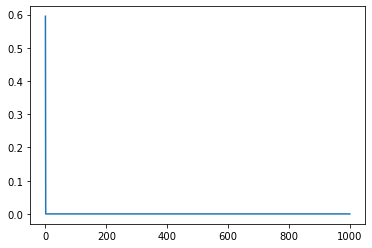

In [32]:
plt.plot(model.history)
plt.show()